# Loan Approval Prediction Model

### Models used: 
1. Logistic Regression Model
2. KNN Model
3. Random Forest Model

### 1. Loading, Understanding and cleaning the data

#### 1.1 Loading the data

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
#For visuals 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Understanding the data
data=pd.read_csv("Train_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### 1.2 Cleaning the data

In [3]:
##column 1,2,3,5,8,9,10 contain null values. Let's see how many.
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
#Before handling missing values, let us check if dataset is noisy i.e. if it contains any irrelavant data like ?? or ##.
cols=data.columns
for i in cols:
    print("Unique values of",i, ":", data[i].unique())

Unique values of Loan_ID : ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' '

In [5]:
#no noisy data is present in any of the columns. Now, null values of categorical data columns can be replaced by mode and null values of numerical data columns can be replaced by mean or median.
#check if data has any outliers, if yes then median is a better choice than mean.
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#As data as outliers, we will replace null columns values with numerical type data by median and categroical null values by mode. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
num_cols=["LoanAmount","Loan_Amount_Term","Credit_History"]
cat_cols=["Gender","Married","Dependents","Self_Employed"]
for i in num_cols:
    data[i]=data[i].fillna(data[i].median())
for i in cat_cols:
    data[i]=data[i].fillna(data[i].mode()[0])

In [8]:
#check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### 1.3 Handling Outliers

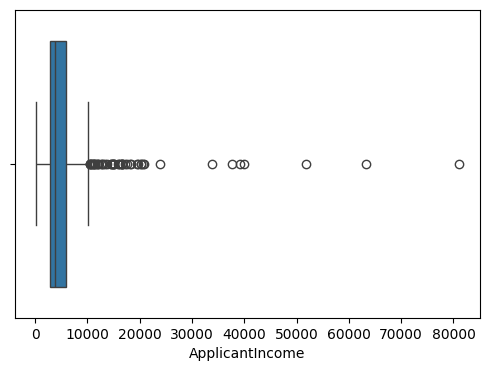

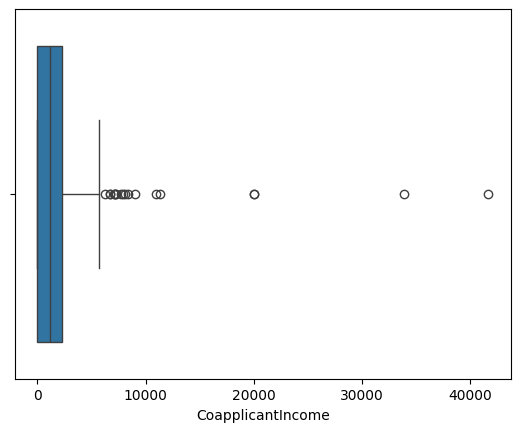

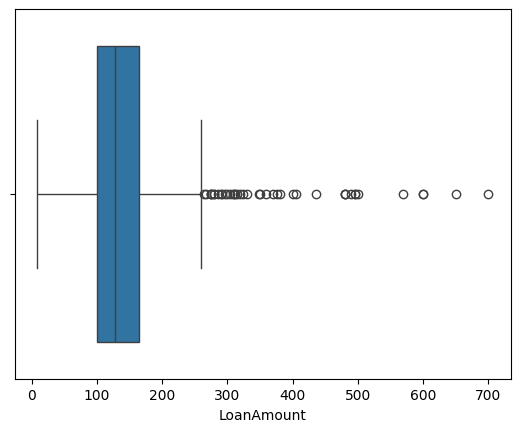

In [9]:
#Handling outliers. First let us find outliers by boxplot for numerical value columns.
cols_plot=["ApplicantIncome","CoapplicantIncome","LoanAmount"]
plt.figure(figsize=(6,4))
for i in cols_plot:
    sns.boxplot(x=data[i])
    plt.show()

In [10]:
#Replacing outliers by median.
for i in cols_plot:
    data[i]=data[i].astype(float)
    Q1=data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-(1.5*IQR)
    upper=Q3+(1.5*IQR)
    median=data[i].median()
    data[i]=data[i].where((data[i]>=lower) & (data[i]<=upper),median)

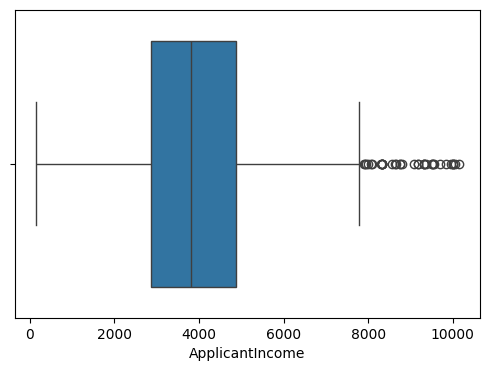

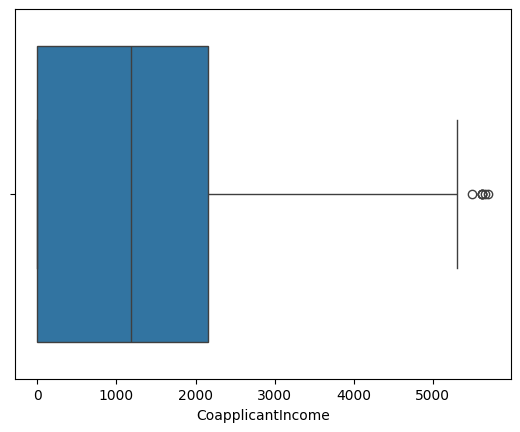

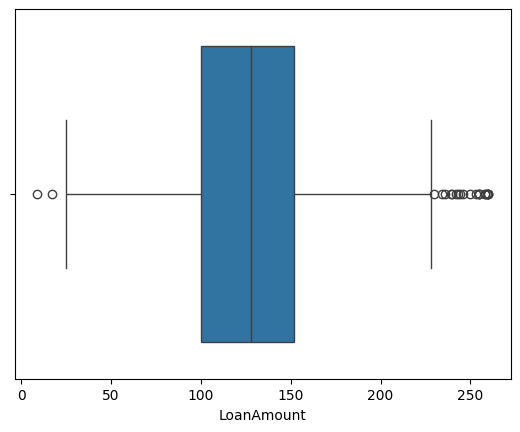

In [11]:
#check
plt.figure(figsize=(6,4))
for i in cols_plot:
    sns.boxplot(x=data[i])
    plt.show()

##### Now, even though the boxplot shows outliers, the outliers have been already handled. The outliers boxplot shows now are for the newer range of IQR. 

#### 1.4 Dropping Irrelevant Columns

In [12]:
data.corr(method="pearson",numeric_only=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.198660,0.409572,-0.035532,0.043470
CoapplicantIncome,-0.198660,1.000000,0.220926,-0.005549,0.003795
LoanAmount,0.409572,0.220926,1.000000,0.079114,-0.007632
Loan_Amount_Term,-0.035532,-0.005549,0.079114,1.000000,-0.004705
Credit_History,0.043470,0.003795,-0.007632,-0.004705,1.000000


##### The columns above cannot be dropped as they do impact the predicted outcome collectively even if they have small correlation value.
##### Also, columns like Loan_ID and Gender can be dropped directly.Loan_ID is simply a unique identifier and has no relation to loan status approval whatsoever. Considering Gender can create biased models as gender cannot truly be taken as a parameter that decides loan status approval. 
##### Note: Married can also be reasoned the same, however, including it seems to improve performance of both KNN and Random Forest. More detailed analysis is present in Conclusion.

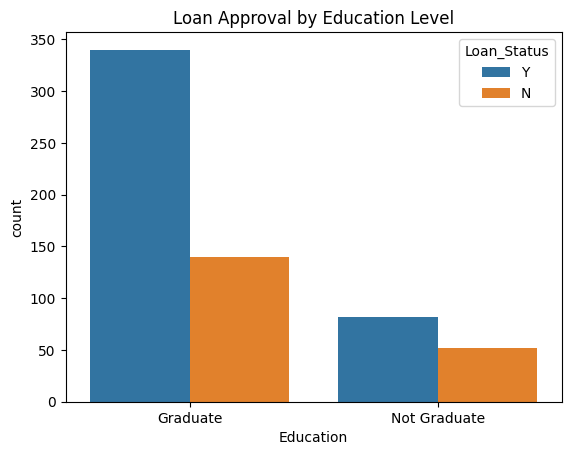

In [13]:
# considering education column. 
sns.countplot(x='Education', hue='Loan_Status', data=data)
plt.title('Loan Approval by Education Level')
plt.show()

##### Education status does not seem to impact loan status significantly, but also considering approval rates for graduates(around 70%) and not graduates(around 61%) we cannot call it trivial either. Either way, keeping Education does not reduce any complecity at this point and it can be dropped later we necessary. 

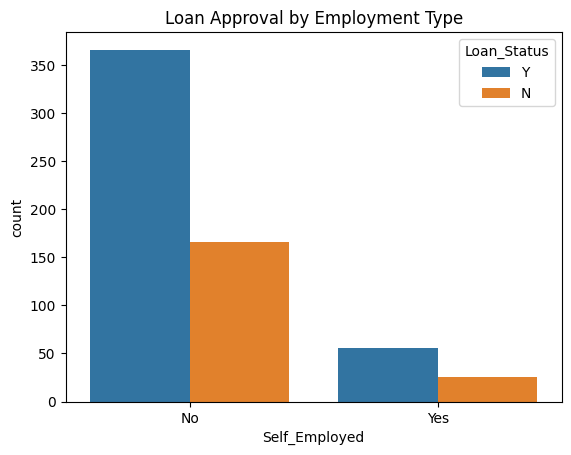

In [14]:
sns.countplot(x="Self_Employed",hue="Loan_Status",data=data)
plt.title("Loan Approval by Employment Type")
plt.show()

##### This case is similar to education level. So we will keep it anyway.
##### Also, We will keep Property Area as it does impact loan status because it can be used as collateral. Urban, semi-Urban and rural areas all have different value and thus, it makes a difference in prediction. 

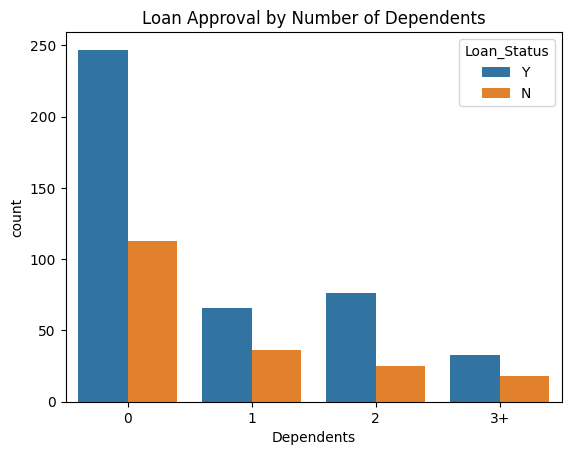

In [15]:
sns.countplot(x="Dependents",hue="Loan_Status",data=data)
plt.title("Loan Approval by Number of Dependents")
plt.show()

In [16]:
#We will keep dependents for now too as it does not clearly show whether it is related or not to loan status.

In [17]:
# dropping columns
processed_data = data.drop(["Loan_ID","Gender"],axis=1)

### 2. Transforming data

Classification models like logistic regression model, KNN and Random forest all require numeric inputs to train. Thus, we must convert the categorical data in the dataset to numeric.

In [18]:
#Manually converting Loan_Status to numerical(0 or 1) so that it remains the same
processed_data["Loan_Status"]=processed_data["Loan_Status"].map({"Y":1,"N":0})
# creating a copy of data to ensure original data remains the same in case of any error
data1=processed_data.copy()
# converting categorical data to numerical data by unique values in columns
data1=pd.get_dummies(data1,drop_first=True)

### 3. Building, Training and Validating the Model

In [19]:
#importing performance measurement tools and spliting tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
#For visuals 
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Logistic Regression Model

In [20]:
# importing logistic regression model
from sklearn.linear_model import LogisticRegression 

In [21]:
#dividing the data into questions(x)-answers(y) format. 
x=data1.columns
x=list(set(x)-set(["Loan_Status"]))
x=data1[x]
y=data1["Loan_Status"]

In [22]:
#spliting the data into train and valid.
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.3,random_state=0)

In [23]:
#because the dataset has been attributes that are unevenly scaled, it gives a convergence error. Therefore,we need to scale the data.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_valid=scaler.fit_transform(x_valid)

In [24]:
# visualization of data can be done later to understand relations between attributes only if the accuracy of logistic regression is bad. This saves time. 
logistic_model=LogisticRegression()
#training the model
logistic_model.fit(x_train,y_train)
#validating the model by test_x
predictions=logistic_model.predict(x_valid)

Accuracy of Logistic Regression Model:  82.70270270270271
Precision:  0.8148148148148148
Recall Score:  0.9850746268656716
f1 Score:  0.8918918918918919
Confusion Matrix:  [[ 21  30]
 [  2 132]]


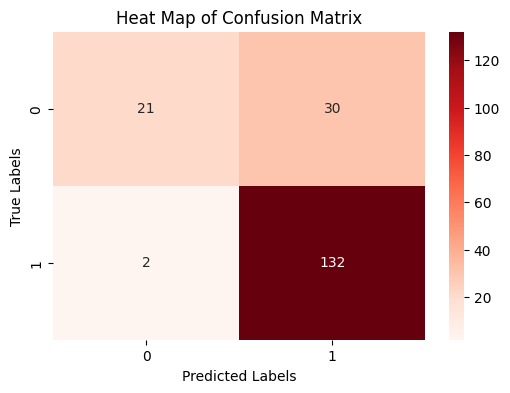

In [25]:
# checking the accuracy of the model
accuracy1=accuracy_score(y_valid,predictions)
print("Accuracy of Logistic Regression Model: ",accuracy1*100)
# confusion matrix can used to know how many incorrect predictions were made(FP+FN)
confu_matrix=confusion_matrix(y_valid,predictions)
#precision tells out of all loan approved predictions, how many were correct on a scale of 0 to 1.
precision1=precision_score(y_valid,predictions)
print("Precision: ",precision1)
# Recall Score tells out of all loans approved, how many were correctly predicted on a scale of 0 to 1. 
recall1=recall_score(y_valid,predictions)
print("Recall Score: ",recall1)
# f1 score as a balance between precision and recall score
f1_score1=f1_score(y_valid,predictions)
print("f1 Score: ",f1_score1)
print("Confusion Matrix: ",confu_matrix)
plt.figure(figsize=(6, 4))
sns.heatmap(confu_matrix, annot=True, fmt='d', cmap='Reds')
plt.title("Heat Map of Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#### 2. K Nearest Neighbors Model

In [26]:
#importing the knn model
from sklearn.neighbors import KNeighborsClassifier

In [27]:
#Training KNN model
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predictions2=knn.predict(x_valid)

Accuracy of KNN Model:  81.08108108108108
Confusion Matrix:  [[ 21  30]
 [  5 129]]
Precision:  0.8113207547169812
Recall Score:  0.9626865671641791
f1 Score:  0.8805460750853242


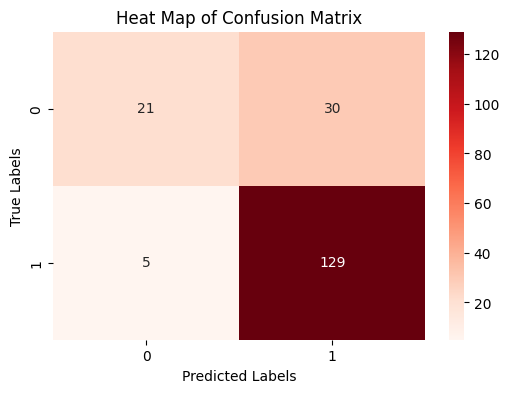

In [28]:
#Performance Measurements
accuracy2=accuracy_score(y_valid,predictions2)
print("Accuracy of KNN Model: ",accuracy2*100)
confu_matrix2=confusion_matrix(y_valid,predictions2)
print("Confusion Matrix: ",confu_matrix2)
precision2=precision_score(y_valid,predictions2)
print("Precision: ",precision2)
recall2=recall_score(y_valid,predictions2)
print("Recall Score: ",recall2)
f1_score2=f1_score(y_valid,predictions2)
print("f1 Score: ",f1_score2)
plt.figure(figsize=(6, 4))
sns.heatmap(confu_matrix2, annot=True, fmt='d', cmap='Reds')
plt.title("Heat Map of Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#### 3. Random Forest Model

In [29]:
#importing random forest model
from sklearn.ensemble import RandomForestClassifier

In [30]:
#train the model
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
predictions3=rf.predict(x_valid)

Accuracy of Random Forest Model:  79.45945945945945
Confusion Matrix:  [[ 23  28]
 [ 10 124]]
Precision:  0.8157894736842105
Recall Score:  0.9253731343283582
f1 Score:  0.8671328671328671


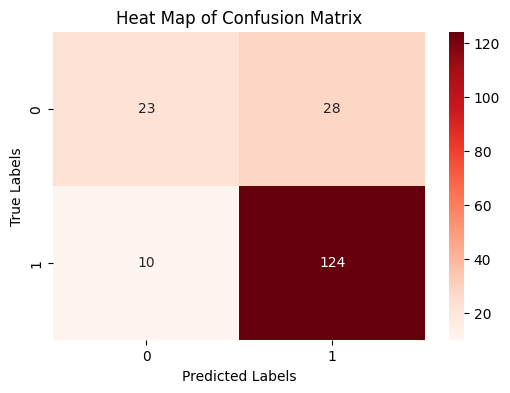

In [31]:
#Performance Measurements
accuracy3=accuracy_score(y_valid,predictions3)
print("Accuracy of Random Forest Model: ",accuracy3*100)
confu_matrix3=confusion_matrix(y_valid,predictions3)
print("Confusion Matrix: ",confu_matrix3)
precision3=precision_score(y_valid,predictions3)
print("Precision: ",precision3)
recall3=recall_score(y_valid,predictions3)
print("Recall Score: ",recall3)
f1_score3=f1_score(y_valid,predictions3)
print("f1 Score: ",f1_score3)
plt.figure(figsize=(6, 4))
sns.heatmap(confu_matrix3, annot=True, fmt='d', cmap='Reds')
plt.title("Heat Map of Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### 4. Comparison Between Models

In [32]:
acc=[accuracy1,accuracy2,accuracy3]
pre=[precision1,precision2,precision3]
re=[recall1,recall2,recall3]
f=[f1_score1,f1_score2,f1_score3]
df = pd.DataFrame({
    "Logistic Regression": [accuracy1, precision1, recall1, f1_score1],
    "KNN": [accuracy2, precision2, recall2, f1_score2],
    "Random Forest": [accuracy3, precision3, recall3, f1_score3]
}, index=["Accuracy", "Precision", "Recall", "F1 Score"])
df

,Logistic Regression,KNN,Random Forest
Accuracy,0.827027,0.810811,0.794595
Precision,0.814815,0.811321,0.815789
Recall,0.985075,0.962687,0.925373
F1 Score,0.891892,0.880546,0.867133


Text(0.5, 1.0, 'Performance Measure of Classification Model')

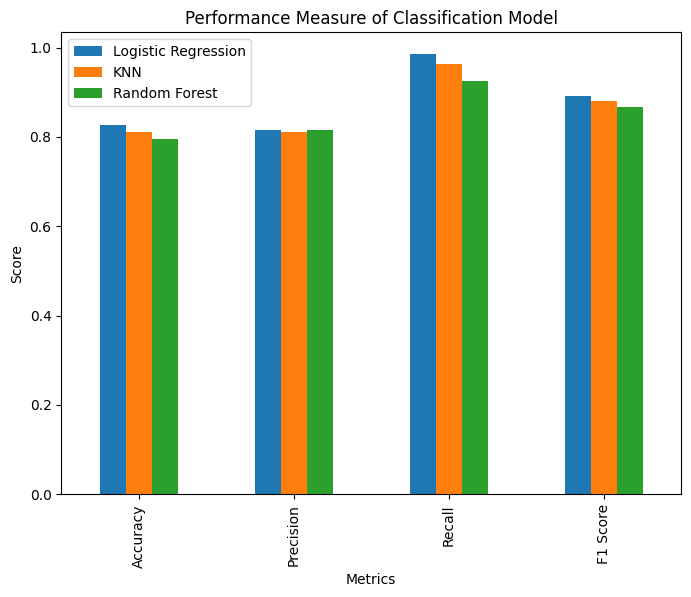

In [33]:
df.plot(kind="bar",figsize=(8,6))
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.title("Performance Measure of Classification Model")

### 5. Conclusion-

##### 📊 Model Performance Summary (Feature Dropping Impact)
| Feature Dropped           | Model               | Accuracy   | Precision  | Recall     | F1 Score   |
| ------------------------- | ------------------- | ---------- | ---------- | ---------- | ---------- |
| **None** *(Baseline)*     | Logistic Regression | 0.8270     | 0.8148     | 0.9851     | 0.8919     |
|                           | KNN                 | 0.8054     | 0.8101     | 0.9552     | 0.8767     |
|                           | Random Forest       | **0.8270**     | **0.8148**     | **0.9851**     | **0.8919**     |
| **Gender Only**           | Logistic Regression | 0.8270     | 0.8148     | 0.9851     | 0.8919     |
|                           | KNN                 | **0.8108** | **0.8113** | **0.9627**     | **0.8805** |
|                           | Random Forest       | 0.7892     | 0.8105     | 0.9254     | 0.8641     |
| **Married Only**          | Logistic Regression | 0.8270     | 0.8148     | 0.9851     | 0.8919     |
|                           | KNN                 |0.8054| 0.8063     |0.9627 | 0.8778     |
|                           | Random Forest       | 0.8000     | 0.8129     | 0.9403 | 0.8720 |
| **Both Gender & Married** | Logistic Regression | 0.8270     | 0.8148     | 0.9851     | 0.8919     |
|                           | KNN                 | 0.7946     | 0.8038     | 0.9478     | 0.8699     |
|                           | Random Forest       | 0.7838 | 0.8133 | 0.9104     | 0.8592 |


#### Analysis:
##### 1) Logistic Regression Model performs consistently for all cases. It is the most robust and it can be concluded that it predicts based on core parameters such as credit history.
##### 2) Random Forest performs best when all parameters are included. However, the decision to drop Gender was necessary to avoid building a biased model as gender cannot be used as a parameter to approve loans.
##### 3) KNN Performed best when Gender was excluded.
   ##### Note: Gender must be dropped as a parameter to avoid building a biased model even if it including it boosts performance. 

#### Verdict:
##### For the given dataset, Logistic Regression Model performs the best out of the three classification models.